##Practica 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

### Problema 1 ¿en que negocio conviene comprar?


In [ ]:
# Variables
n1, k1 = 10, 10
n2, k2 = 50, 48
n3, k3 = 200, 186

In [ ]:
# Pp  prior uniforme en (0,1) sobre los p_i
def Pp(p):
    return 1


# Pk_np
# k_i, el numero de "me gustas" que recibe el negocio i. k_i <= n_i
def Pk_np(k, n, p):
    return st.binom.pmf(k, n, p)

#### 1.1 Interpretacion de Galton Board


- Cada obstaculo representa una decision binomial, gusta o no gusta.
- Cada recipiente representa el numero total de "me gusta" posible
- La cantidad de niveles representa el numero de personas $n_i$ que toman la decision


#### 1.2 Plotear posterior de $p_i$


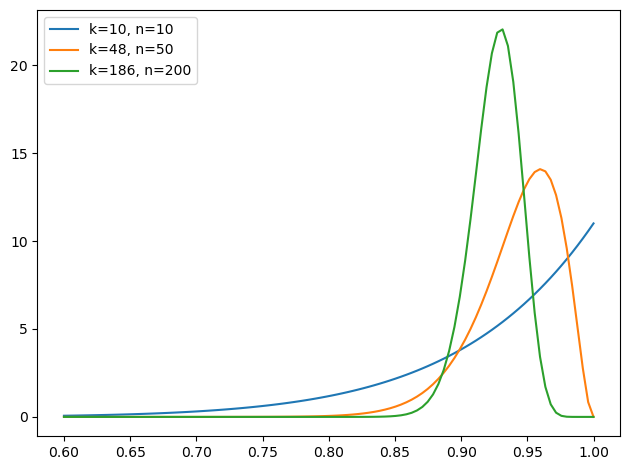

In [22]:
# Posterior de p_i
def Pp_kn(p, k, n):
    return st.beta.pdf(p, k + 1, n - k + 1)


plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k1, n1),
    label=f"k={k1}, n={n1}",
)
plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k2, n2),
    label=f"k={k2}, n={n2}",
)
plt.plot(
    np.linspace(0.6, 1, 100),
    Pp_kn(np.linspace(0.6, 1, 100), k3, n3),
    label=f"k={k3}, n={n3}",
)

plt.legend()
plt.tight_layout()

#### 1.3 Intervalos de credibilidad de $p_i$


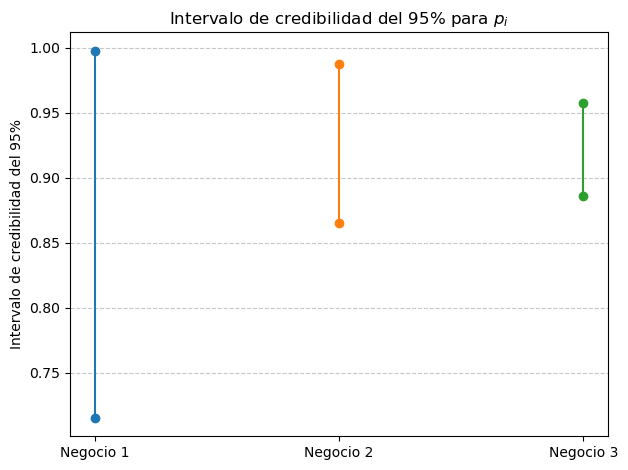

In [30]:
# intervalos de credibilidad del 95%

intervalos = [
    st.beta.interval(0.95, k1 + 1, n1 - k1 + 1),
    st.beta.interval(0.95, k2 + 1, n2 - k2 + 1),
    st.beta.interval(0.95, k3 + 1, n3 - k3 + 1),
]

labels = ["Negocio 1", "Negocio 2", "Negocio 3"]
x = np.arange(len(labels))

plt.figure()
for i, (low, high) in enumerate(intervalos):
    plt.plot([i, i], [low, high], marker="o")

plt.xticks(x, labels)
plt.ylabel("Intervalo de credibilidad del 95%")
plt.title("Intervalo de credibilidad del 95% para $p_i$")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#### 1.4 Elegir donde comprar.


- ¿que forma tiene la expresion final? la del valor esperado para P dados los datos


In [36]:
from scipy.integrate import quad

# Calcular la distribucion de probabilidad marginal de nuestra experiencia dado los datos,
# integrando todos los valores de p.

prob_marginal_m = []
for k, n in [(k1, n1), (k2, n2), (k3, n3)]:
    integral, _ = quad(lambda p: p * Pp_kn(p, k, n), 0, 1)
    prob_marginal_m.append(integral)

for i, p in enumerate(prob_marginal_m):
    print(f"Probabilidad marginal de m=1 para el negocio {i+1}: {p:.3f}")

Probabilidad marginal de m=1 para el negocio 1: 0.917
Probabilidad marginal de m=1 para el negocio 2: 0.942
Probabilidad marginal de m=1 para el negocio 3: 0.926
